In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow
%matplotlib inline

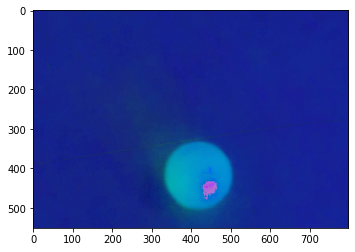

In [2]:
img = cv2.imread('ball.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)

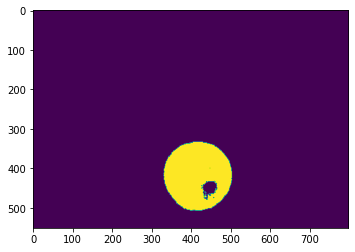

In [3]:
l_red=np.array([0,100,100])
u_red=np.array([100,255,255])
mask = cv2.inRange(hsv, l_red, u_red)
plt.imshow(mask)

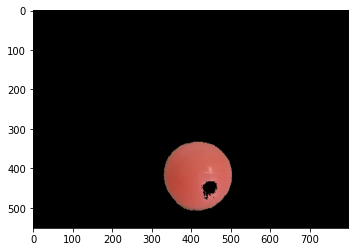

In [4]:
res = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(res)

In [0]:
kernel = np.ones((25,25),np.uint8)
dilation = cv2.dilate(res,kernel,iterations =1)

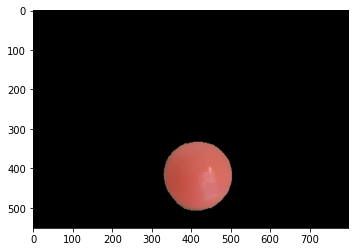

In [6]:
res = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)
plt.imshow(res)

In [0]:
gray = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

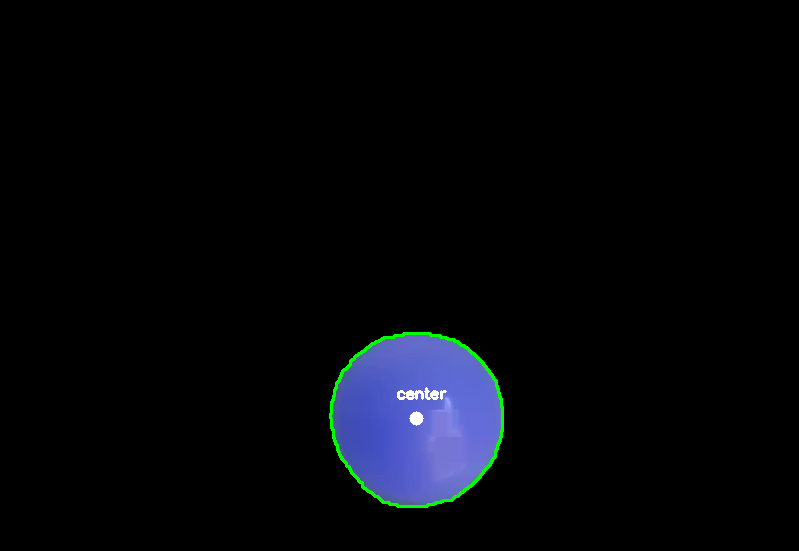

In [8]:
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv2.drawContours(res, [c], -1, (0, 255, 0), 2)
	cv2.circle(res, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(res, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
	cv2_imshow(res)
	cv2.waitKey(0)